In [1]:
import matplotlib.pyplot as plt
import numpy as np

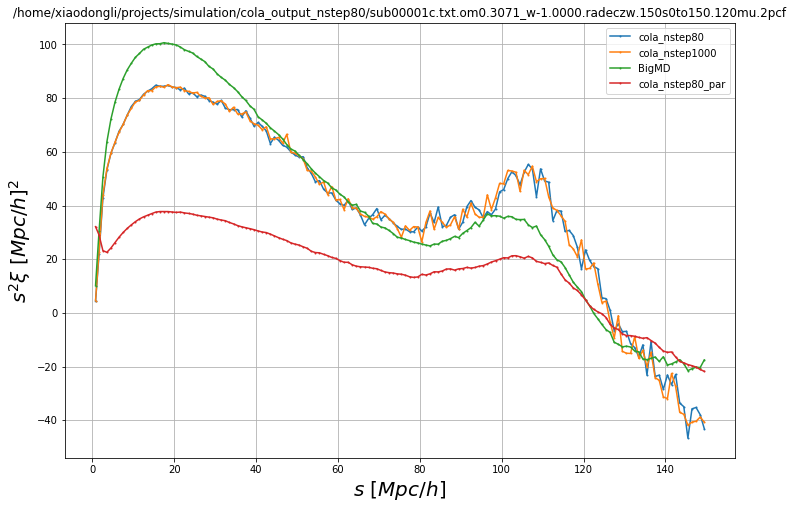

In [2]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
for filename_label in [
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 'cola_nstep80'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep1000/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 'cola_nstep1000'],
    #['/home/xiaodongli/projects/simulation/cola_output_128box_800c/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 'cola_output_128box_800c'],
    ['/public/projects/cf_pks/BigMDPL_mge1e13/old2pcf/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 'BigMD'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep80/sub00001c.txt.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 'cola_nstep80_par']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;

    Xi_s = [];

    DDs=[data[row][3] for row in range(len(data))]
    DRs=[data[row][4] for row in range(len(data))]
    RRs=[data[row][6] for row in range(len(data))]

    for row in range(len(DDs)):
        DDs[row] /= norms[0]
        DRs[row] /= norms[1]
        RRs[row] /= norms[2]

    sumDDs = [sum(DDs[row*nummubin:row*nummubin+nummubin]) for row in range(numsbin)]
    sumDRs = [sum(DRs[row*nummubin:row*nummubin+nummubin]) for row in range(numsbin)]
    sumRRs = [sum(RRs[row*nummubin:row*nummubin+nummubin]) for row in range(numsbin)]

    Xi_s = [(sumDDs[row]-2*sumDRs[row]+sumRRs[row])/sumRRs[row]   for row in range(numsbin)]
    
    X = [((row**3+(row+1)**3)*0.5)**(1.0/3) for row in range(150)]
    Y = [X[row]**2*Xi_s[row] for row in range(len(Xi_s))]
    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
    ax.set_xlabel('$s\ [Mpc/h]$', fontsize=20)
    ax.set_ylabel('$s^2\\xi\ [Mpc/h]^2$', fontsize=20)
ax.grid()
ax.legend()


In [5]:
print data

[[ 4.166667e-03  5.000000e-01  1.514269e+01 ...  4.222000e+03
   4.222000e+03  6.244500e+04]
 [ 1.250000e-02  5.000000e-01  1.365006e+01 ...  2.934000e+03
   2.934000e+03  4.426700e+04]
 [ 2.083333e-02  5.000000e-01  1.347311e+01 ...  3.883000e+03
   3.883000e+03  5.726000e+04]
 ...
 [ 9.791667e-01  1.495000e+02 -3.895440e-03 ...  2.237013e+08
   2.237013e+08  3.353372e+09]
 [ 9.875000e-01  1.495000e+02 -3.857484e-03 ...  2.241852e+08
   2.241852e+08  3.360247e+09]
 [ 9.958333e-01  1.495000e+02 -3.660591e-03 ...  2.249599e+08
   2.249599e+08  3.372239e+09]]


In [5]:
import struct

In [8]:
file = '/home/xiaodongli/projects/simulation/cola_output_nstep80/sub00001c.b'
with open(file,'rb') as f:
    data = f.read()

    print data    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

